<a href="https://colab.research.google.com/github/Ryu4824/Section_1_Project/blob/main/Section_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 1 Project**

## Project 문제 정의

### 배경

> 류재영님은 게임 회사의 데이터 팀에 합류했습니다. **다음 분기에 어떤 게임을 설계해야 할까** 라는 고민을 해결하기 위해, 기존의 데이터에 기반하여 인사이트를 얻고, 의사결정을 하고자 하는 것이 여러분의 목표입니다.

### 필수 조건

- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가?
 - 지역은 어떻게 구분했는지 설명함
 - 지역별로 선호하는 게임의 장르를 파악함
 - 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함

- 연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?
 - 트렌드는 어떤 것을 기준으로 파악했는지 설명함
 - 연도별로 트렌드가 존재하는지 여부를 언급함
 - 왜 존재한다/존재하지 않는다고 생각했는지 설명함

- 인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되었는가?
 - 인기가 많다는 것을 어떻게 정의했는지 설명함
 - 해당 게임이 왜 인기가 많다고 생각했는지 설명함
 - 시각화를 통해 무엇을 나타내고자 하는지를 고려하여 파라미터를 조정함 (제목,축이름 필수, 그 외 파라미터는 선택사항)
 - 해당 분석을 통해 어떤 인사이트를 도출할 수 있는지 설명함

- 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되었는가?
 - 분석에 대한 결론이 영상에서 제시됨 

### 추가 조건 (Advanced Goal)
`다음 추가 조건은 1개 이상 만족 시 3점을 받을 수 있습니다.`

- 디테일한 시점 및 목표 설정이 문제 정의 과정에서 제시되었는가?
- 도메인 지식을 활용하여 비지니스 인사이트를 도출하였는가?
- 제공된 데이터셋 외에 추가 데이터를 사용하였는가?
- 통계적 기법을 활용한 가설 검정을 진행하였는가?
- 완성도 높은 시각화를 보여주었는가?
 - 가독성, 목적성이 잘 드러나는 시각화


🕹️ **data description**

- `Name` : 게임의 이름입니다.
- `Platform` : 게임이 지원되는 플랫폼의 이름입니다.
- `Year` : 게임이 출시된 연도입니다.
- `Genre` : 게임의 장르입니다.
- `Publisher` : 게임을 배급한 회사입니다.
- `NA_Sales` : 북미지역에서의 출고량입니다.
- `EU_Sales` : 유럽지역에서의 출고량입니다.
- `JP_Sales` : 일본지역에서의 출고량입니다.
- `Other_Sales` : 기타지역에서의 출고량입니다.

### EDA


In [32]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [33]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv',index_col=0)
df_copy = df.copy()
df_copy

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [34]:
df_copy[df_copy.duplicated(keep=False)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8056,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [35]:
#중복값 확인후 제거
df_copy = df_copy.drop_duplicates()
df_copy.reset_index(drop=True,inplace=True)

In [36]:
df_copy

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16592,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16593,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16594,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16595,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16547 non-null  object 
 4   Publisher    16539 non-null  object 
 5   NA_Sales     16597 non-null  object 
 6   EU_Sales     16597 non-null  object 
 7   JP_Sales     16597 non-null  object 
 8   Other_Sales  16597 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [38]:
df_copy.isnull().sum()

Name             0
Platform         0
Year           270
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [39]:
data_columns = ['Year','Publisher','Genre']

for col in data_columns:
  #중복된 Name에 'Year','Publisher','Genre'컬럼이 nan인 경우
  dn = df_copy[df_copy.duplicated('Name') & df_copy[col].isnull()]

  #같은 Name의 'Year','Publisher','Genre' 값을 가져와서 대체하기
  for name in dn['Name'].unique():
    value = df_copy.loc[df_copy['Name']==name,col].dropna()
    value_fvi = value.first_valid_index()
    if value_fvi is not None:
      result = df_copy.loc[value_fvi, col]
    df_copy.loc[(df_copy['Name'] == name) & df_copy[col].isnull(), col] = result

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [40]:
df_copy.isnull().sum() #결측치 확인

Name             0
Platform         0
Year           158
Genre           38
Publisher       54
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [41]:
df_copy.dropna(subset=['Year','Genre','Publisher'], inplace=True)
df_copy.isnull().sum()

/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [42]:
#소수점을 없애기 위해 int로 바꾼다음 앞에 숫자 추가를 위해 str 바꿔줍니다
df_copy.Year = df_copy.Year.astype(int).astype(str)

#data<=9인 값은 200을 앞에 추가
df_copy.loc[df_copy['Year'].astype(int)<=9, 'Year'] = '200' + df_copy.loc[df_copy['Year'].astype(int)<=9, 'Year'].astype(str)
#data<=23인 값은 20을 앞에 추가
df_copy.loc[df_copy['Year'].astype(int)<=23, 'Year'] = '20' + df_copy.loc[df_copy['Year'].astype(int)<=23, 'Year'].astype(str)
#23<data<100인 값은 19를 앞에 추가
df_copy.loc[(df_copy['Year'].astype(int)>23)&(df_copy['Year'].astype(int)<100), 'Year'] = '19' + df_copy.loc[(df_copy['Year'].astype(int)>23)&(df_copy['Year'].astype(int)<100), 'Year'].astype(str)

#마지막엔 int로 타입 변환
df_copy.Year = df_copy.Year.astype(int)

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [43]:
df_copy.reset_index(drop=True,inplace=True)
df_copy

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16361,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16362,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16363,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16364,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [44]:
'''sales = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']
for sal_name in sales:
  for i, value in enumerate(df_copy[sal_name]):
    if value[-1] == 'M':
      df_copy.loc[i, sal_name] = float(value[:-1]) * 1000000
    elif value[-1] == 'K':
      df_copy.loc[i, sal_name] = float(value[:-1]) * 1000
    else:
      df_copy.loc[i, sal_name] = float(value) * 1000000'''

"sales = ['NA_Sales',\t'EU_Sales',\t'JP_Sales',\t'Other_Sales']\nfor sal_name in sales:\n  for i, value in enumerate(df_copy[sal_name]):\n    if value[-1] == 'M':\n      df_copy.loc[i, sal_name] = float(value[:-1]) * 1000000\n    elif value[-1] == 'K':\n      df_copy.loc[i, sal_name] = float(value[:-1]) * 1000\n    else:\n      df_copy.loc[i, sal_name] = float(value) * 1000000"

In [45]:
def value(sale):
  if sale[-1] == 'M':
    return float(sale[:-1]) * 1000000
  elif sale[-1] == 'K':
    return float(sale[:-1]) * 1000
  else:
    return float(sale) * 1000000

sales = ['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']
for i in sales:
  df_copy[i] = df_copy[i].apply(value)

<ipython-input-45-32d2f10159ae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[i] = df_copy[i].apply(value)


In [46]:
df_copy.iloc[:,-4:] = df_copy.iloc[:,-4:].astype(int)

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


### 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가?
 - 지역은 어떻게 구분했는지 설명함
 - 지역별로 선호하는 게임의 장르를 파악함
 - 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했는지를 설명함

In [47]:
df_copy.Genre.unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [48]:
df_m=df_copy[['Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].copy()
id_vars = df_m.columns[:1]
Genre_sales = pd.melt(df_m, id_vars=id_vars,var_name='Region', value_name='Sales')
Genre_sales

,Genre,Region,Sales
0,Action,NA_Sales,40000
1,Action,NA_Sales,170000
2,Adventure,NA_Sales,0
3,Misc,NA_Sales,40000
4,Platform,NA_Sales,120000
...,...,...,...
65459,Platform,Other_Sales,10000
65460,Action,Other_Sales,0
65461,Sports,Other_Sales,130000
65462,Action,Other_Sales,30000


In [49]:
Genre_sales

,Genre,Region,Sales
0,Action,NA_Sales,40000
1,Action,NA_Sales,170000
2,Adventure,NA_Sales,0
3,Misc,NA_Sales,40000
4,Platform,NA_Sales,120000
...,...,...,...
65459,Platform,Other_Sales,10000
65460,Action,Other_Sales,0
65461,Sports,Other_Sales,130000
65462,Action,Other_Sales,30000


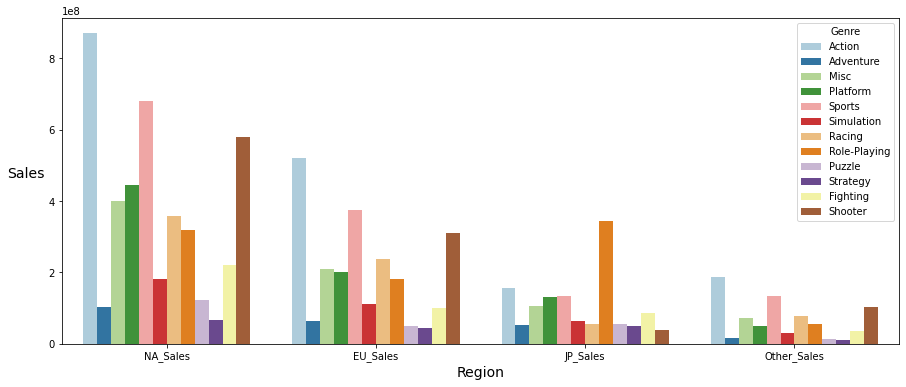

In [50]:
plt.figure(figsize=(15, 6))
sns.barplot(data = Genre_sales,x='Region',y='Sales',hue='Genre',estimator=sum,ci=0,palette='Paired')
plt.xlabel('Region',fontsize=14)
plt.ylabel('Sales',rotation=0, ha='right',fontsize=14)
plt.show()

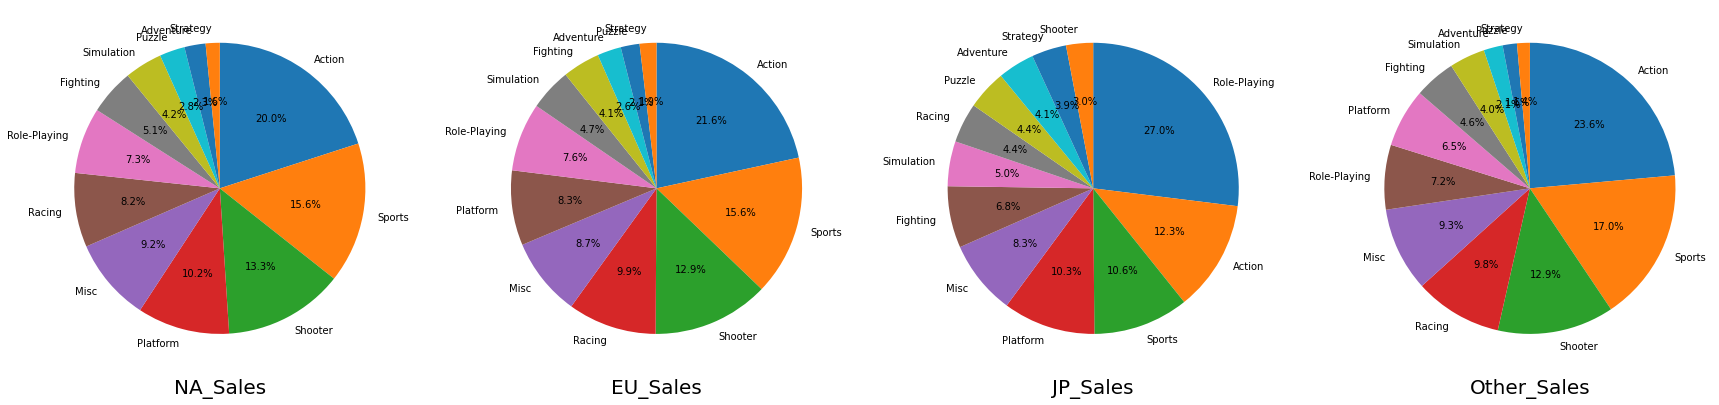

In [51]:
# 지역별로 장르의 총 판매량 계산
na_genre_sales = df_copy.groupby('Genre')['NA_Sales'].sum().sort_values(ascending = False)
eu_genre_sales = df_copy.groupby('Genre')['EU_Sales'].sum().sort_values(ascending = False)
jp_genre_sales = df_copy.groupby('Genre')['JP_Sales'].sum().sort_values(ascending = False)
other_genre_sales = df_copy.groupby('Genre')['Other_Sales'].sum().sort_values(ascending = False)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(30, 10))

ax1.pie(na_genre_sales, labels=na_genre_sales.index, autopct='%.1f%%', startangle=90,counterclock=False)
ax2.pie(eu_genre_sales, labels=eu_genre_sales.index, autopct='%.1f%%', startangle=90,counterclock=False)
ax3.pie(jp_genre_sales, labels=jp_genre_sales.index, autopct='%.1f%%', startangle=90,counterclock=False)
ax4.pie(other_genre_sales, labels=other_genre_sales.index, autopct='%.1f%%', startangle=90,counterclock=False)
ax1.set_xlabel('NA_Sales',fontsize=20)
ax2.set_xlabel('EU_Sales',fontsize=20)
ax3.set_xlabel('JP_Sales',fontsize=20)
ax4.set_xlabel('Other_Sales',fontsize=20)
plt.show()

북아메리카,유럽,그외는 **액션과 스포츠**의 비율이 가장 높습니다 액션은 **화려하고 몰입감**이 좋기 때문이고 스포츠는 **경쟁심을 유발**하여 더욱 재미있게 즐길 수 있다고 생각합니다. 하지만 일본은 **RPG**가 가장 높습니다 이는 일본에서는 대부분의 게임이 **콘솔** 게임이나 **휴대용** 게임으로 인기를 끌기 때문인 것 같습니다

### 연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?
 - 트렌드는 어떤 것을 기준으로 파악했는지 설명함
 - 연도별로 트렌드가 존재하는지 여부를 언급함
 - 왜 존재한다/존재하지 않는다고 생각했는지 설명함

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbcbdc0cbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbcbdc1c190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbcbdc02700>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbcbdc1c730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbcbdc1ca00>],
 'means': []}

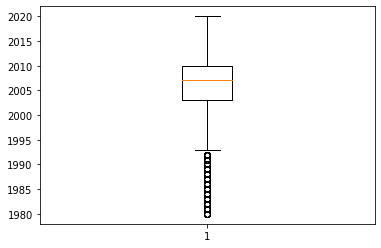

In [52]:
plt.boxplot(df_copy['Year'])

In [53]:
df_copy.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16366.000000,1.636600e+04,1.636600e+04,1.636600e+04,1.636600e+04
mean,2006.410607,2.655585e+05,1.473647e+05,7.779115e+04,4.829586e+04
std,5.822902,8.206543e+05,5.069602e+05,3.082172e+05,1.891550e+05
min,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2007.000000,8.000000e+04,2.000000e+04,0.000000e+00,1.000000e+04
75%,2010.000000,2.400000e+05,1.100000e+05,4.000000e+04,4.000000e+04
max,2020.000000,4.149000e+07,2.902000e+07,1.022000e+07,1.057000e+07


.describe()와 박스플롯 중 어느걸로 사분위수를 맞춰야하지?

In [54]:
#년도의 4분위수로 나눈 장르별 판매량을 보려고 해당 컬럼만 가져옴
df_m=df_copy[['Year','Genre','NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].copy()
id_vars = df_m.columns[:2]
total_sales = pd.melt(df_m, id_vars=id_vars,var_name='Region', value_name='Sales')
total_sales

,Year,Genre,Region,Sales
0,2008,Action,NA_Sales,40000
1,2009,Action,NA_Sales,170000
2,2010,Adventure,NA_Sales,0
3,2010,Misc,NA_Sales,40000
4,2010,Platform,NA_Sales,120000
...,...,...,...,...
65459,2006,Platform,Other_Sales,10000
65460,2005,Action,Other_Sales,0
65461,2015,Sports,Other_Sales,130000
65462,2013,Action,Other_Sales,30000


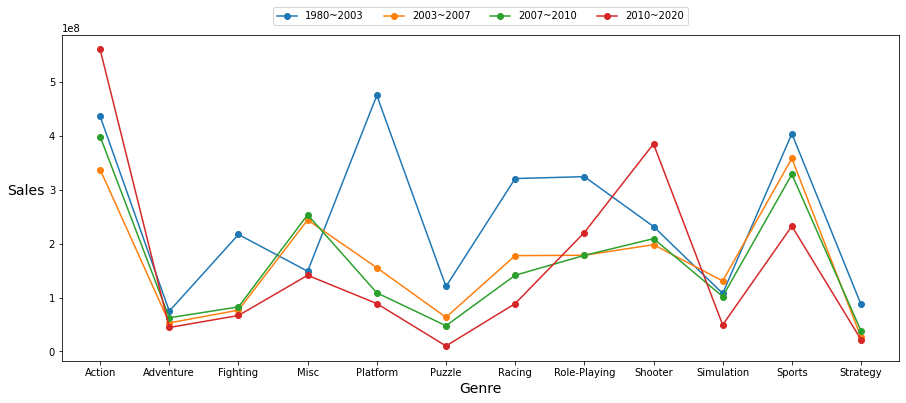

In [55]:
year_sales1 = total_sales.query("(1980<Year) & (Year<=2003)").groupby('Genre')['Sales'].sum()
year_sales2 = total_sales.query("(2003<Year) & (Year<=2007)").groupby('Genre')['Sales'].sum()
year_sales3 = total_sales.query("(2007<Year) & (Year<=2010)").groupby('Genre')['Sales'].sum()
year_sales4 = total_sales.query("(2010<Year) & (Year<=2020)").groupby('Genre')['Sales'].sum()

plt.figure(figsize=(15, 6))
plt.plot(year_sales1.index, year_sales1, marker='o', label='1980~2003')
plt.plot(year_sales2.index, year_sales2, marker='o', label='2003~2007')
plt.plot(year_sales3.index, year_sales3, marker='o', label='2007~2010')
plt.plot(year_sales4.index, year_sales4, marker='o', label='2010~2020')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4)
plt.xlabel('Genre',fontsize=14)
plt.ylabel('Sales',rotation=0, ha='right',fontsize=14)
plt.show()

우선 **액션 게임**은 언제나 대중에게 사랑받는 게임입니다 그외의 게임을  년도별로 살펴보겠습니다.
*   1980~2003에서는 마리오와 소닉이 나온 시점이라 Platform게임이 가장 인기가 많았습니다
*   2003~2007에서는 새로운 콘솔 게임기 출시와 스포츠가 점차 대중화가 된 이유가 있겠습니다.
*   2007~2010에서는 언제나 사랑받는 액션게임과 스포츠게임이 앞도적이고 그외 Misc 수치를 보면 다른게임도 많이 발전하고 있다고 볼수 있습니다.
*   2010~2020에서는 그래픽의 발전으로 인하여 액션과 슈팅게임이 앞도적인 사랑을 받고 있습니다.

## 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되었는가?
 - 분석에 대한 결론이 영상에서 제시됨 

In [56]:
total_sales = total_sales.set_index('Year')
total_sales.index = pd.to_datetime(total_sales.index, format='%Y')

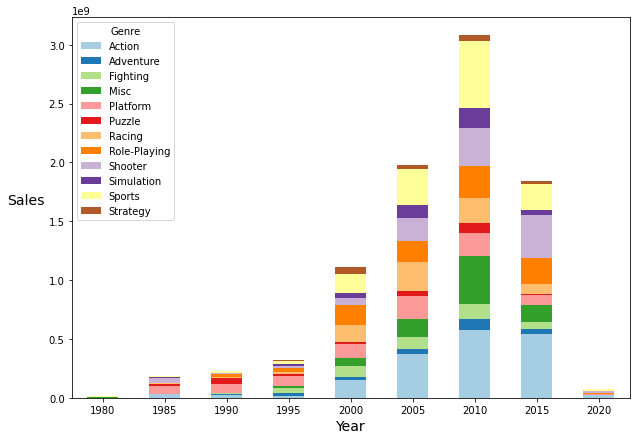

In [57]:
sns.set_palette('Paired')

df_pivot = pd.pivot_table(total_sales, index = pd.Grouper(freq='5Y'), columns = 'Genre', values='Sales',aggfunc='sum')
xname = df_pivot.plot.bar(stacked=True, figsize=(10,7))

name = []
for i in range(len(df_pivot)):
  name.append(str(df_pivot.index[i])[:4])

xname.set_xticklabels(name,rotation=0)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Sales',rotation=0, ha='right',fontsize=14)
plt.show()

년도별 장르의 판매량을 히스토그램으로 시각화한 결과입니다. </br>
가장 최근 판매량이 슈팅게임과 액션게임의 지표가 가장 높습니다. 이유는 그래픽의 발전으로 생각이 됩니다. 하지만, 액션게임은 인기가 많은 만큼 많은 게임이 있기 때문에 발매를 한다고해서 성공하기 힘들다는 생각이고, 최근 판매량의 지표도 가장 높은 만큼 슈팅게임을 출시하는 것이 가장 좋아보입니다

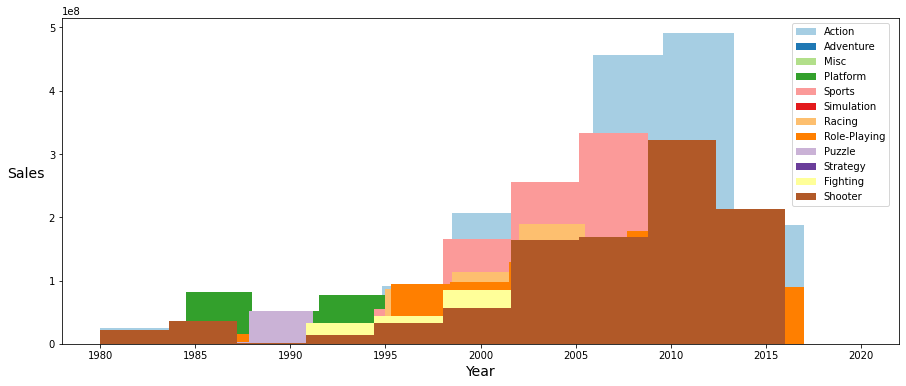

In [58]:
#히스토그램으로도 나타내보았지만 작은 값들이 안보여져서 고민을 해보았습니다.
plt.figure(figsize=(15, 6))

sns.set_palette('Paired')

for name in total_sales['Genre'].unique():
  Genre_Year = total_sales.loc[total_sales['Genre'] == name].groupby('Year')['Sales'].sum()
  index = Genre_Year.index
  value = Genre_Year.values
  plt.hist(index, weights=value,label=name)
  
plt.xlabel('Year',fontsize=14)
plt.ylabel('Sales',rotation=0, ha='right',fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.93,1))
plt.show()